<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/notebooks/%E5%86%92%E9%9A%AA17_Cooper_%E7%9C%9F%E7%9A%84%E6%98%AF%E9%A6%AC%E7%88%BE%E6%BF%9F%E6%96%AF%E5%97%8E%EF%BC%9F%E4%BD%BF%E7%94%A8%E5%90%8D%E9%96%80_CNN_%E5%B9%AB%E5%8A%A9%E8%BE%A8%E8%AD%98%EF%BC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 1. 讀入資料集

In [3]:
!wget --no-check-certificate \
    https://github.com/yenlung/Python-AI-Book/raw/main/dataset/Cooper_img.zip \
    -O /content/Cooper.zip

--2023-01-27 03:53:00--  https://github.com/yenlung/Python-AI-Book/raw/main/dataset/Cooper_img.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/Cooper_img.zip [following]
--2023-01-27 03:53:00--  https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/Cooper_img.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023448 (999K) [application/zip]
Saving to: ‘/content/Cooper.zip’

/content/Cooper.zip 100%[===================>] 999.46K  --.-KB/s    in 0.02s   

2023-01-27 03:53:00 (59.4 MB/s) - ‘/content/Cooper.zip’ saved [1023448/1023448]



In [4]:
import os
import zipfile

local_zip = '/content/Cooper.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content/'
cooper_dir = 'Cooper/'
thedir = base_dir + cooper_dir

In [6]:
cooper = [f"{cooper_dir}/cooper0{i}.jpg" for i in range(1, 7)]

### 2. 讀入一隻 Cooper 試試

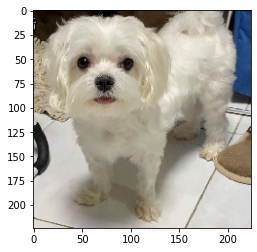

In [7]:
img = load_img(cooper[2], target_size = (224, 224))
plt.imshow(img)

In [8]:
x = img_to_array(img)

### 3. 讀入 ResNet50 及 labels

In [9]:
with open('imagenet-classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [10]:
labels[:10]

['tench 鯉魚類淡水魚',
 'goldfish 金魚',
 'great white shark 大白鯊',
 'tiger shark 虎鯊',
 'hammerhead 鎚頭鯊',
 'electric ray 電魟',
 'stingray 魟魚',
 'cock 公雞',
 'hen 母雞',
 'ostrich 鴕鳥']

In [11]:
model = ResNet50()

102967424/102967424 [==============================] - 3s 0us/step


In [12]:
x = img_to_array(img).reshape(1, 224, 224, 3)

In [13]:
inp = preprocess_input(x)

In [14]:
outp = model.predict([inp])

1/1 [==============================] - 8s 8s/step


In [15]:
y_pred = np.argmax(model.predict(inp), axis=-1)[0]

1/1 [==============================] - 1s 1s/step


In [16]:
print(f"ResNet 覺得是 {labels[y_pred]}")

ResNet 覺得是 Maltese dog 馬爾濟斯犬


### 4. 做成 Web App!

In [17]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━

In [18]:
import gradio as gr

In [21]:
def classify_image(inp):
    inp = inp.reshape((-1, 224, 224, 3))
    inp = preprocess_input(inp)
    prediction = resnet.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(224, 224), label="請上傳一張圖片")
label = gr.outputs.Label(num_top_classes=3, label="模型猜測的答案是：")
#sample_images = [[f'cooper0{i}.jpg'] for i in range(1, 7)]
sample_images = [f"{cooper_dir}/cooper0{i}.jpg" for i in range(1, 7)]
gr.Interface(fn=classify_image, 
             inputs=image, 
             outputs=label, 
             examples=sample_images).launch(share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d9aee34c-28a3-4906.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


ReadTimeout: ignored